### Pandas Series

In [5]:
from pandas import Series

skt = Series([92600, 92400, 92100, 94300, 92300])
print(skt)

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64


In [6]:
print(skt[0], skt[2])

92600 92100


In [7]:
skt2 = Series([92600, 92400, 92100, 94300, 92300], 
                index=['2016-02-19', '2016-02-18', 
                       '2016-02-17', '2016-02-16',
                       '2016-02-15'])
print(skt2)

2016-02-19    92600
2016-02-18    92400
2016-02-17    92100
2016-02-16    94300
2016-02-15    92300
dtype: int64


In [8]:
print(skt2['2016-02-19'])
print(skt2['2016-02-17'])

92600
92100


In [9]:
print(skt2.index)
print(skt2.values)

Index(['2016-02-19', '2016-02-18', '2016-02-17', '2016-02-16', '2016-02-15'], dtype='object')
[92600 92400 92100 94300 92300]


In [10]:
from pandas import Series

stock_1 = Series([100, 200, 300], index=['SAM', 'SKT', 'LGE'])
stock_2 = Series([300, 100, 200], index=['LGE', 'SAM', 'SKT'])

print(stock_1 + stock_2)

LGE    600
SAM    200
SKT    400
dtype: int64


### Pandas DataFrame

In [11]:
from pandas import DataFrame

skt = {'open':  [11650, 11100, 11200, 11100, 11000],
        'close': [11900, 11600, 11000, 11100, 11050], 
        'high':  [12100, 11800, 11200, 11100, 11150],
        'low' :  [11600, 11050, 10900, 10950, 10900]}

skt_df = DataFrame(skt)
print(skt_df)

    open  close   high    low
0  11650  11900  12100  11600
1  11100  11600  11800  11050
2  11200  11000  11200  10900
3  11100  11100  11100  10950
4  11000  11050  11150  10900


In [12]:
skt = {'open':  [11650, 11100, 11200, 11100, 11000],
        'close': [11900, 11600, 11000, 11100, 11050], 
        'high':  [12100, 11800, 11200, 11100, 11150],
        'low' :  [11600, 11050, 10900, 10950, 10900]}
date = ['19.01.25', '19.01.24', '19.01.23', '19.01.22', '19.01.21']
skt_df = DataFrame(skt, columns=['open', 'high', 'low', 'close'], index=date)

print(skt_df)

           open   high    low  close
19.01.25  11650  12100  11600  11900
19.01.24  11100  11800  11050  11600
19.01.23  11200  11200  10900  11000
19.01.22  11100  11100  10950  11100
19.01.21  11000  11150  10900  11050


In [13]:
open_price = skt_df['open']
print(open_price)
print(type(open_price))

19.01.25    11650
19.01.24    11100
19.01.23    11200
19.01.22    11100
19.01.21    11000
Name: open, dtype: int64
<class 'pandas.core.series.Series'>


In [14]:
open_price_df = skt_df[['open']]
print(open_price_df)
print(type(open_price_df))

           open
19.01.25  11650
19.01.24  11100
19.01.23  11200
19.01.22  11100
19.01.21  11000
<class 'pandas.core.frame.DataFrame'>


In [15]:
# row를 index로 접근할 수 없다.
print(skt_df['19.01.25'])

KeyError: '19.01.25'

In [16]:
row_data = skt_df.loc['19.01.25']
print(row_data)
print(type(row_data))

open     11650
high     12100
low      11600
close    11900
Name: 19.01.25, dtype: int64
<class 'pandas.core.series.Series'>


In [17]:
print(skt_df.columns)
print(skt_df.values)
print(skt_df.index)

Index(['open', 'high', 'low', 'close'], dtype='object')
[[11650 12100 11600 11900]
 [11100 11800 11050 11600]
 [11200 11200 10900 11000]
 [11100 11100 10950 11100]
 [11000 11150 10900 11050]]
Index(['19.01.25', '19.01.24', '19.01.23', '19.01.22', '19.01.21'], dtype='object')


In [18]:
import pandas as pd
idx = pd.to_datetime(date, format='%y.%m.%d')
skt_df = DataFrame(skt, columns=['open', 'high', 'low', 'close'], index=idx)

print(skt_df.index)
print(skt_df)

DatetimeIndex(['2019-01-25', '2019-01-24', '2019-01-23', '2019-01-22',
               '2019-01-21'],
              dtype='datetime64[ns]', freq=None)
             open   high    low  close
2019-01-25  11650  12100  11600  11900
2019-01-24  11100  11800  11050  11600
2019-01-23  11200  11200  10900  11000
2019-01-22  11100  11100  10950  11100
2019-01-21  11000  11150  10900  11050


In [19]:
print(skt_df['2019-01'])

             open   high    low  close
2019-01-25  11650  12100  11600  11900
2019-01-24  11100  11800  11050  11600
2019-01-23  11200  11200  10900  11000
2019-01-22  11100  11100  10950  11100
2019-01-21  11000  11150  10900  11050


## Pandas를 이용한 주가 분석

### 1. Pandas `read_html` 을 사용해 data 얻기
1. pandas의 `read_html` 함수를 사용해 krx(한국거래소)에서 주식 종목코드 가져오기
2. `read_html`로 네이버 금융에서 원하는 회사의 주가정보를 가져오는 함수 작성
3. 수집한 정보를 `matplotlib`를 통해 그래프로 출력

In [20]:
import pandas as pd

krx에서 주식 종목코드 가져오기

`read_html` 함수는 `<table>` 태그를 찾아 자동으로 파싱해 준다.

In [21]:
code_num_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)

print(type(code_num_df))
print(type(code_num_df[0]))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
code_num_df = code_num_df[0]
print(code_num_df.columns)

Index(['회사명', '종목코드', '업종', '주요제품', '상장일', '결산월', '대표자명', '홈페이지', '지역'], dtype='object')


In [23]:
code_num_df = code_num_df[['회사명', '종목코드']]
code_num_df.head()

,회사명,종목코드
0,DSR,155660
1,GS,78930
2,GS글로벌,1250
3,HDC현대산업개발,294870
4,LG이노텍,11070


In [24]:
code_num_df.종목코드 = code_num_df.종목코드.map('{:06d}'.format)
code_num_df.head()

,회사명,종목코드
0,DSR,155660
1,GS,078930
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,LG이노텍,011070


네이버 금융에서 원하는 회사의 주식정보 가져오기

https://finance.naver.com/item/sise_day.nhn?code=033780&page=1 형태의 url을 통해 자료를 가져올 수 있다.

`code` : 종목코드, `page` : 원하는 페이지 번호

In [25]:
code_num = code_num_df.query('회사명=="{}"'.format('삼성전자'))['종목코드'].to_string()
print(code_num)

923    005930


In [26]:
def make_url(name, code_num_df):
    # to_string의 index를 없애고, lstrip()으로 왼쪽 여백 제거
    code_num = code_num_df.query('회사명=="{}"'.format(name))['종목코드'].to_string(index=False).lstrip()
    url = 'http://finance.naver.com/item/sise_day.nhn?code={}'.format(code_num)
    
    return url

In [27]:
def get_data(item_name, code_num_df, start_page, end_page):
    url = make_url(item_name, code_num_df)
    
    ret = pd.DataFrame()
    
    # 페이지 수만큼 반복하면서 결과를 수집
    for page in range(start_page, end_page + 1):
        request_url = '{url}&page={page}'.format(url=url, page=page)
        ret = ret.append(pd.read_html(request_url, header=0)[0], ignore_index=True)
    
    return ret

In [28]:
test_df = get_data('삼성전자', code_num_df, 1, 11)

In [30]:
test_df.info()

# 결측값이 있는지 확인
print(len(test_df.loc[test_df.isnull().any(axis=1)]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      110 non-null    object 
 1   종가      110 non-null    float64
 2   전일비     110 non-null    float64
 3   시가      110 non-null    float64
 4   고가      110 non-null    float64
 5   저가      110 non-null    float64
 6   거래량     110 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.1+ KB
55


In [34]:
test_df = test_df.dropna()
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2019-11-19 to 2020-04-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   110 non-null    int32
 1   diff    110 non-null    int32
 2   open    110 non-null    int32
 3   high    110 non-null    int32
 4   low     110 non-null    int32
 5   volume  110 non-null    int32
dtypes: int32(6)
memory usage: 3.4 KB


,close,diff,open,high,low,volume
date,,,,,,
2019-11-19,53500,0,53200,53500,52700,8907177
2019-11-20,52000,1500,53400,53400,52000,12560070
2019-11-21,51000,1000,51600,52100,50600,14298646
2019-11-22,51600,600,51000,51600,50900,8478310
2019-11-25,51800,200,52200,52600,51700,9050625


In [37]:
def get_data(item_name, code_num_df, start_page, end_page):
    url = make_url(item_name, code_num_df)
    ret = pd.DataFrame()
    
    for page in range(start_page, end_page + 1):
        request_url = '{url}&page={page}'.format(url=url, page=page)
        ret = ret.append(pd.read_html(request_url, header=0)[0], ignore_index=True)
    
    ret = ret.dropna()
    
    # 사용 편의를 위해 한글 컬럼명을 영문명으로 변경
    ret = ret.rename(columns={'날짜': 'date', '종가': 'close', '전일비': 'diff', \
                      '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'})
    
    # float 형태의 값을 int로 캐스팅
    ret[['close', 'diff', 'open', 'high', 'low', 'volume']] \
    = ret[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 
    
    # 날짜를 인덱스로 설정
    ret['date'] = pd.to_datetime(ret['date'])
    ret = ret.set_index('date')
    
    # 날짜를 기준으로 오름차순 정렬 -> 그래프 출력을 위함
    ret = ret.sort_values(by=['date'], ascending=True)
    
    return ret

In [39]:
test_df = get_data('삼성전자', code_num_df, 1, 11)
test_df.head()

,close,diff,open,high,low,volume
date,,,,,,
2019-11-19,53500,0,53200,53500,52700,8907177
2019-11-20,52000,1500,53400,53400,52000,12560070
2019-11-21,51000,1000,51600,52100,50600,14298646
2019-11-22,51600,600,51000,51600,50900,8478310
2019-11-25,51800,200,52200,52600,51700,9050625


`matplotlib`로 그래프 그리기

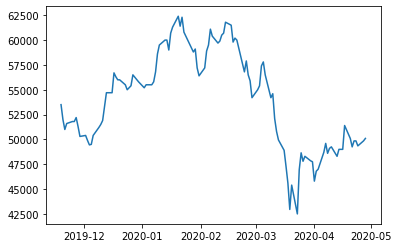

In [40]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_df.index, test_df['close'], label='close')

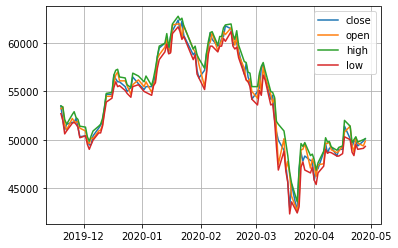

In [41]:
for col in ['close', 'open', 'high', 'low']:
    plt.plot(test_df.index, test_df[col], label=col)

plt.rcParams["figure.figsize"] = (5,10)
plt.legend(loc='best')
plt.grid()

2개의 그래프로 나눠서 출력하기

`plt.subpot(nrows, ncols, index)` 함수를 통해 여러 그래프를 출력할 수 있다.

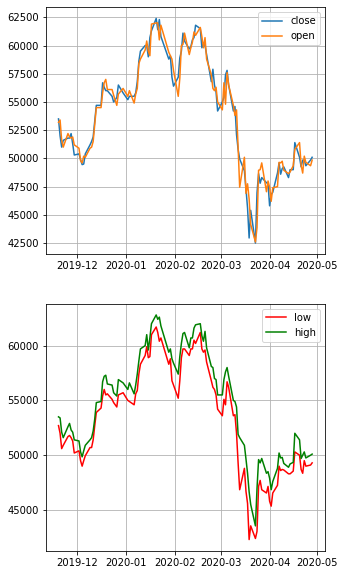

In [43]:
plt.subplot(2, 1, 1)
plt.plot(test_df.index, test_df['close'], label='close')
plt.plot(test_df.index, test_df['open'], label='open')
plt.legend(loc='best')
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(test_df.index, test_df['low'], label='low', color='red')
plt.plot(test_df.index, test_df['high'], label='high', color='green')
plt.legend(loc='best')
plt.grid()

### 2. Pandas `datareader` 를 사용해 Data 얻기
1. `pandas_datareader` 를 사용해 삼성전자 `005930.KS` 주가정보 가져오기
2. 수정종가 `Adj Close` 를 그래프로 그리기
3. `Adj Close` 의 5일, 12일, 26일, 120일 이동평균을 구하고 그래프로 그리기
4. MACD 지표 구해서 그래프로 그리기

In [46]:
from datetime import datetime
import pandas_datareader.data as reader
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

start = datetime(2017, 1, 31)
end = datetime(2019, 1, 31)

data = reader.DataReader("005930.KS", "yahoo", start, end)

In [47]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2017-01-31 to 2019-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       484 non-null    float64
 1   Low        484 non-null    float64
 2   Open       484 non-null    float64
 3   Close      484 non-null    float64
 4   Volume     484 non-null    float64
 5   Adj Close  484 non-null    float64
dtypes: float64(6)
memory usage: 26.5 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,39900.0,39460.0,39900.0,39460.0,17992200.0,8340.279297
2017-02-01,39660.0,39040.0,39540.0,39120.0,14150400.0,8268.416992
2017-02-02,39660.0,39200.0,39600.0,39360.0,15029300.0,8319.143555
2017-02-03,39500.0,39180.0,39400.0,39460.0,10386350.0,8340.279297
2017-02-06,39660.0,39140.0,39580.0,39560.0,8860700.0,8361.416016


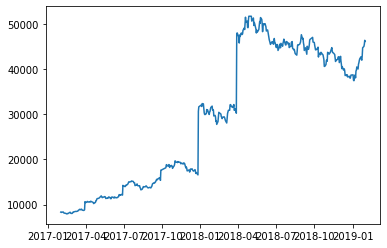

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data['Adj Close'])

In [49]:
data[data['Volume'] == 0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-26,53620.0,53620.0,53620.0,53620.0,0.0,15955.597656
2018-04-30,53000.0,53000.0,53000.0,53000.0,0.0,51733.824219
2018-05-02,53000.0,53000.0,53000.0,53000.0,0.0,51733.824219
2018-05-03,53000.0,53000.0,53000.0,53000.0,0.0,51733.824219


In [50]:
data = data[data['Volume'] != 0]

In [51]:
ma5 = data['Adj Close'].rolling(window=5).mean()
ma5.tail()

Date
2019-01-25    42940.0
2019-01-28    43400.0
2019-01-29    44070.0
2019-01-30    44950.0
2019-01-31    45570.0
Name: Adj Close, dtype: float64

In [52]:
data.insert(len(data.columns), "MA5", ma5)
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2019-01-25,44750.0,43750.0,44300.0,44750.0,22789395.0,44750.0,42940.0
2019-01-28,45500.0,44600.0,45000.0,45050.0,17998914.0,45050.0,43400.0
2019-01-29,45500.0,44350.0,45050.0,45500.0,16215017.0,45500.0,44070.0
2019-01-30,46400.0,44800.0,44800.0,46400.0,17505980.0,46400.0,44950.0
2019-01-31,47050.0,46150.0,46650.0,46150.0,21621145.0,46150.0,45570.0


In [53]:
for date in [12, 26, 120]:
    ma = data['Adj Close'].rolling(window=date).mean()
    data.insert(len(data.columns), 'MA{}'.format(date), ma)
    
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5,MA12,MA26,MA120
Date,,,,,,,,,,
2019-01-25,44750.0,43750.0,44300.0,44750.0,22789395.0,44750.0,42940.0,41820.833333,39975.165415,42904.012793
2019-01-28,45500.0,44600.0,45000.0,45050.0,17998914.0,45050.0,43400.0,42258.333333,40225.514573,42898.373665
2019-01-29,45500.0,44350.0,45050.0,45500.0,16215017.0,45500.0,44070.0,42675.000000,40485.550180,42898.533236
2019-01-30,46400.0,44800.0,44800.0,46400.0,17505980.0,46400.0,44950.0,43204.166667,40797.349008,42903.734375
2019-01-31,47050.0,46150.0,46650.0,46150.0,21621145.0,46150.0,45570.0,43625.000000,41099.532452,42915.046908


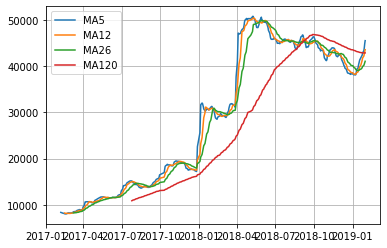

In [54]:
for col in ['MA5', 'MA12', 'MA26', 'MA120']:
    plt.plot(data.index, data[col], label=col)
    
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid()

#### MACD (Moving Average Convergence Divergence) 구하기
1. `MACD` : MACD = EMA(12) - EMA(6) , EMA(n) : n일간의 이동평균
2. `Signal` : MACD의 9일간의 이동평균
3. `Oscillator` : MACD - Signal

In [55]:
def get_macd(df, col, short=6, long=12, t=9):
    ret = pd.DataFrame(df)
    
    ma_short = ret[col].rolling(window=short).mean()    
    ma_long = ret[col].rolling(window=long).mean()
    macd = ma_long - ma_short
    signal = macd.rolling(window=t).mean()
    oscillator = macd - signal
    
    ret = ret.assign(macd=macd, signal=signal, oscillator=oscillator).dropna()
    
    return ret

In [56]:
import pandas as pd
data = data.drop(['MA5', 'MA12', 'MA26', 'MA120'], axis=1)
macd = get_macd(data, 'Adj Close', short=12, long=26)
macd.head()

,High,Low,Open,Close,Volume,Adj Close,macd,signal,oscillator
Date,,,,,,,,,
2017-03-20,42120.0,41740.0,42000.0,41900.0,10250050.0,8855.999023,-273.332488,-164.951507,-108.380981
2017-03-21,42680.0,41760.0,41780.0,42560.0,14220150.0,8995.496094,-290.972950,-189.173682,-101.799269
2017-03-22,42460.0,41580.0,41600.0,42460.0,16427250.0,8974.361328,-296.311154,-211.643544,-84.667610
2017-03-23,42360.0,41700.0,42200.0,41800.0,15397100.0,8834.862305,-290.187087,-231.963655,-58.223432
2017-03-24,41980.0,41080.0,41600.0,41500.0,12808150.0,8771.455078,-282.355894,-249.989500,-32.366394


Text(0, 0.5, 'Amount')

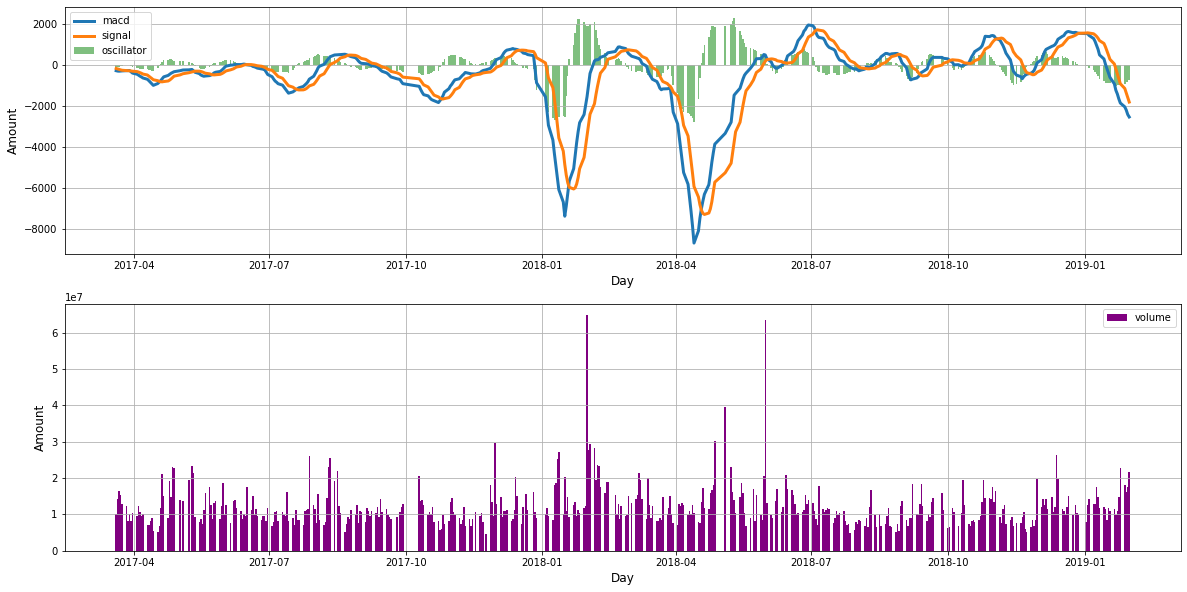

In [57]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True 

plt.subplot(2,1,1)
plt.plot(macd.index, macd['macd'], label='macd')
plt.plot(macd.index, macd['signal'], label='signal')
plt.bar(macd.index, macd['oscillator'], label='oscillator', color='green', alpha=0.5, width=1)
plt.legend(loc='best')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.subplot(2,1,2)
plt.bar(macd.index, macd['Volume'], label='volume', color='purple', width=1)
plt.legend(loc='best')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Amount', fontsize=12)